In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
# Fehlerfunktion
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Ableitung der Fehlerfunktion
def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))
    
# Aufbau des Netzwerkes    
input_neurons = 2
hidden_neurons = 30

learning_rate = .25

# Zielfunktion
def f(x):
    return np.cos(x/2) + np.sin(5 / (np.abs(x)+0.4)) + 0.1*x 

# Argument-Wert-Paare
min_value = -10
max_value = 10
number_of_samples = 1001
stepsize = (max_value-min_value) / number_of_samples
X = [-10 + a*stepsize for a in range(0, number_of_samples+1)]
X = np.array([[1, a] for a in X])
y = [f(a[1]) for a in X]

# Initialisiere Gewichte
weights_input_to_hidden = np.random.uniform(-1,1,(input_neurons, hidden_neurons))
weights_hidden_to_output = np.random.uniform(-1,1,hidden_neurons)

# Werte in den Neuronen der hidden layer
net_hidden = np.zeros(hidden_neurons)
out_hidden = np.zeros(hidden_neurons)

# Teile in Trainigs- und Testdaten auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, shuffle=True)

In [3]:
# Hilfsfunktion um den Output des NN für gegebene Eingabe zu berechnen
def calc_output(X_i):
    for hidden_neuron in range(hidden_neurons):
        net_hidden[hidden_neuron] = np.dot(X_i, weights_input_to_hidden[:, hidden_neuron])
        out_hidden[hidden_neuron] = logistic(net_hidden[hidden_neuron])
    net_output = np.dot(out_hidden, weights_hidden_to_output)
    out_output = logistic(net_output)
    return out_output

In [4]:
def calc_error(X_test, y_test):
    summe = 0
    for i, X in enumerate(X_test):
        summe += (calc_output(X) - y_test[i])**2
    return summe / len(X_test)

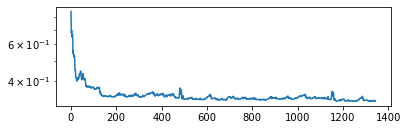

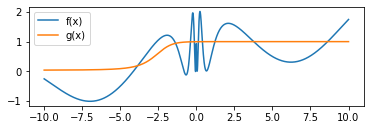

In [5]:
# Enthält den Fehler zu verschiedenen Trainingszeiten
errors = []
# Füge initialen Fehler hinzu
errors.append(calc_error(X_test, y_test))

# Training
# Aktuell 2-mal mit allen Trainingsdatensätzen trainieren
for j in range(2):
    for i in range(len(X_train)):
        # net_output, out_output = calc_output(X_train[i,:], hidden_neurons)
        for hidden_neuron in range(hidden_neurons):
            net_hidden[hidden_neuron] = np.dot(X_train[i,:], weights_input_to_hidden[:, hidden_neuron])
            out_hidden[hidden_neuron] = logistic(net_hidden[hidden_neuron])
        net_output = np.dot(out_hidden, weights_hidden_to_output)
        out_output = logistic(net_output)

        # Partielle Ableitung der Fehlerfunktion nach out des (einzigen) Outputneurons
        error_out = -1* (y_train[i] - out_output)

        for hidden_neuron in range(hidden_neurons):
            # Partielle Ableitungen von: Error / out_hidden; out_hidden / net_hidden; net_hidden / weight
            # TODO: net_output oder out_output überprüfen in logistic_deriv
            gradient_hidden_to_output = error_out * logistic_deriv(net_output) * out_hidden[hidden_neuron]
            
            # For-Schleife für das Training zwischen Eingabeschicht und verdeckter Schicht
            for input_neuron in range(input_neurons):
                input_val = X_train[i, input_neuron]
                # Partielle Ableitung: Error / net_out
                gradient_first_part = error_out * logistic_deriv(net_output)
                # Partielle Ableitung: net_out / out_hidden
                gradient_second_part = weights_hidden_to_output[hidden_neuron]
                # Jetzt gilt: first_part * second_part = Partielle Ableitung von Error / out_hidden
                # Jetzt für third_part: Partielle Ableitung von out_hidden / net_hidden
                # TODO: net_hidden oder out_hidden überprüfen in logistic_deriv
                gradient_third_part = logistic_deriv(net_hidden[hidden_neuron])
                # Partielle Ableitung von net_hidden / weight
                gradient_fourth_part = input_val
                # Gesamter Gradient
                gradient_input_to_hidden =  gradient_first_part * gradient_second_part * gradient_third_part * gradient_fourth_part
                delta = -1 * learning_rate * gradient_input_to_hidden
                weights_input_to_hidden[input_neuron, hidden_neuron] += delta

            delta = -1 * learning_rate * gradient_hidden_to_output
            weights_hidden_to_output[hidden_neuron] += delta

        # Berechne Fehler zu Zeitpunkt i
        errors.append(calc_error(X_test, y_test))

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot([i for i in range(len(errors))], errors)
ax.set_yscale('log')
pylab.show()

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
X = np.arange(-10,10.001,.001)
ax.plot(X, [f(x) for x in X], label="f(x)")
ax.plot(X, [calc_output([1, x]) for x in X], label="g(x)")
ax.legend()
pylab.show()

In [6]:
print(calc_error(X_test, y_test))

0.3222703538749096
